# Regularization

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons 
import seaborn as sns
import  tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense ,Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


<Axes: >

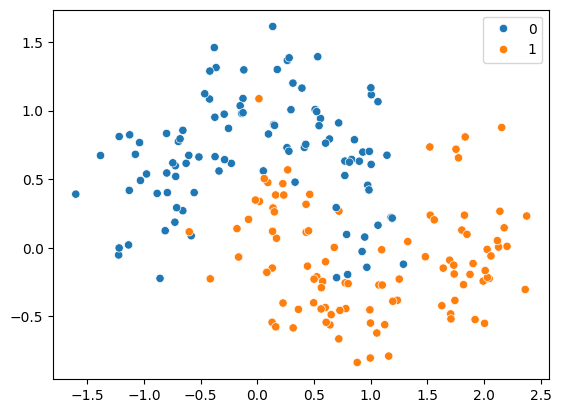

In [22]:
X,y = make_moons(n_samples= 200 ,noise=0.25,random_state=42)

sns.scatterplot(x =X[:,0],y =X[:,1],hue=y)

In [30]:
model1 =Sequential([Dense(150,activation='relu',input_dim=2,kernel_regularizer=l2(0.05) ),
                    Dense(100,activation='relu',kernel_regularizer=l2(0.01)),
                    Dense(50,activation='relu',kernel_regularizer=l2(0.0025)),
                    Dense(1,activation='sigmoid')])
adam = Adam(learning_rate =0.001)
model1.compile(loss ='binary_crossentropy',optimizer = adam,metrics =['accuracy'])

earlyStopping =EarlyStopping(monitor ='val_loss',
                             patience = 20,
                             min_delta =0.001,
                             baseline =None,
                             mode ='auto',
                             verbose =1,
                             restore_best_weights =False)
history = model1.fit(X,y,epochs =1000,callbacks =[earlyStopping],verbose=False,validation_split=0.2)

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 212: early stopping


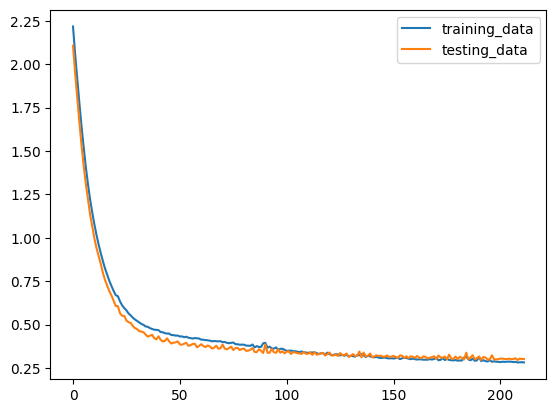

In [31]:
plt.plot(history.history['loss'],label='training_data')
plt.plot(history.history['val_loss'],label ="testing_data")
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step


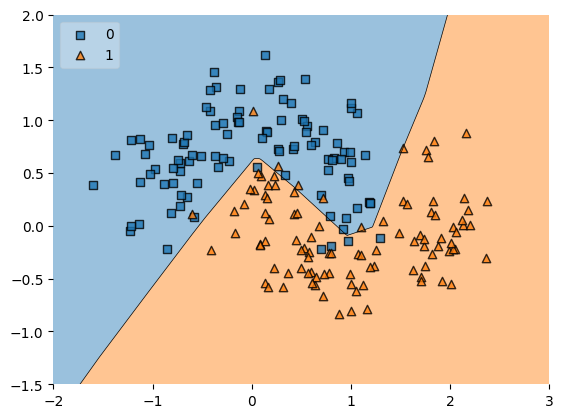

In [32]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y.astype('int'),clf=model1,legend=2)
plt.ylim(-1.5,2)
plt.xlim(-2,3)
plt.show()